<a href="https://colab.research.google.com/github/junanote/test_deeplearning/blob/master/konlpy_8%EC%9B%9410%EC%9D%BC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!python -m pip install konlpy

In [38]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  67520      0 --:--:-- --:--:-- --:--:-- 67520


In [39]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [40]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0   327k      0  0:01:01  0:01:01 --:--:-- 4817k


In [41]:
import pandas as pd
total_data = pd.read_table('./naver_shopping.txt', names=['ratings','reviews'])
total_data.head(10)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [42]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [43]:
total_data.drop_duplicates(subset=['reviews'],inplace=True)
len(total_data)

199908

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((149931,), (149931,), (49977,), (49977,))

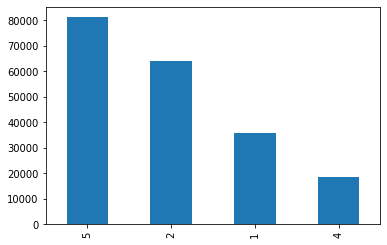

In [47]:
y_data.value_counts().plot(kind='bar')

# NLP(토큰화)


In [48]:
type(x_train)

pandas.core.series.Series

In [49]:
# x_train.str.replace()'[가-힣ㄱ-휴]'.'')

In [50]:
from konlpy.tag import Mecab


In [51]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [58]:
x_train_small = x_train[0:5000]

In [ ]:
sentance = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small :
  encoded = mecab.morphs(tok)
  sentance.append([item for item in encoded if item not in stopwords])

sentance  

## Tokenizer


In [64]:
print(sentance)

[['하루', '자', '나', '니', '찍찍', '힘', '없', '어서', '떨어져', '있', '네요', '반품', '할까', '생각', '다가', '그냥', '잘', '포개', '서', '버립니다', '단순', '찍찍', '힘', '없', '으니', '더', '강한', '찍찍', '구매', '해', '라는', '글', '만', '적', '어', '났', '어도', '돈', '더', '주', '구매', '했', '껀', '데', '암튼', '안', '좋', '네요'], ['얇', '시원', '겠', '어요', '핏', '예쁘', '네요'], ['재', '구매', '지난번', '알갱이', '크', '찌꺼기', '없', '어', '좋', '아서', '재', '구매', '했', '는데', '완전', '속', '기분', '네요', '알갱이', '없이', '반', '갈', '아서', '왔', '진짜', '찌꺼기', '많', '아요', '달', '1', 'kg', '씩', '먹', '는데', '속상해', '~~'], ['포장', '거의', '거적', '대기', '수준', '네여', 'ㅎ', '.', '..', '생각', '보다', '작', '아요', '~'], ['완전', '좋', '지만', '아이', '안', '가지', '놀', '아요'], ['팉태ㅗ팇챵ㅎ나ㅠ타ㅗ태ㅗ턑'], ['별로', '였', '어요', '.', '..', '고기', '질', '그닥', '.', '.'], ['검', '색', '긴', '가루', '떨어짐', 'ㅋ', '싸', '길래', '궁금', '해서', '구매', '해', '봄'], ['재', '구매', '배송', '아주', '빨라요', '!', '!', '저렴', '잘', '샀', '어요', '항상', '여기', '서', '구매', '데', '다음', '또', '구매', '할게요', '^^'], ['탭', '놓', '기', '엔', '작', '네요', '안정', '감', '덜', 'ᆢ노트북', '거치대', '샀', '어야', '했', '는

In [60]:
import tensorflow as tf


In [61]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentance)  

In [ ]:
tokenizer.word_index   # 사전이 만들어짐

In [ ]:
tokenizer.word_counts  # 전체 문장에서 몇번 반복되었는지 확인

In [65]:
total_cnt = len(tokenizer.word_index) # 전체데이터를 돌림  모든거에서 레어에 해당되는 단어를 뺀 데이터를 만듬

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value  # 전체 단어 수
  if(value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value # 2미만인 단어의 수 

In [67]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(8132, 5375, 66.09690113133301, 7.857667955132917)

In [69]:
vocab_size = total_cnt - rare_cnt

In [72]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentance)

In [ ]:
tokenizer.index_word   # -> 숫자로 만듬 

In [75]:
x_train_small = tokenizer.texts_to_sequences(sentance)

In [77]:
print(x_train_small[0:3]) # 리스트이므로 shape안됨

[[308, 276, 33, 60, 1196, 415, 22, 55, 982, 10, 3, 140, 1197, 47, 157, 43, 8, 1, 51, 1537, 1, 1196, 415, 22, 342, 61, 1538, 1196, 11, 44, 523, 651, 49, 146, 20, 652, 594, 199, 61, 52, 11, 15, 1785, 118, 1786, 9, 4, 3], [197, 332, 41, 5, 595, 244, 3], [29, 11, 1539, 1540, 153, 1541, 22, 20, 4, 50, 29, 11, 15, 7, 156, 449, 267, 3, 1540, 203, 617, 546, 50, 75, 102, 1541, 141, 6, 159, 143, 750, 289, 19, 7, 1, 107]]


In [78]:
len(x_train_small[0]), len(x_train_small[40]), len(x_train_small[50])

(48, 9, 13)

In [80]:
hist_len = [len(words) for words in x_train_small]  

(array([ 19.,  42., 169., 646., 361., 339., 302., 471., 177., 156., 280.,
        125., 107., 113., 209.,  76.,  99., 176.,  74.,  73.,  64., 105.,
         58.,  50.,  56.,  89.,  46.,  58.,  59.,  31.,  34.,  35.,  58.,
         24.,  28.,  38.,  17.,  23.,  23.,  38.,   9.,   7.,  11.,   9.,
          5.,   4.,   5.,   0.,   0.,   2.]),
 array([ 1.  ,  2.28,  3.56,  4.84,  6.12,  7.4 ,  8.68,  9.96, 11.24,
        12.52, 13.8 , 15.08, 16.36, 17.64, 18.92, 20.2 , 21.48, 22.76,
        24.04, 25.32, 26.6 , 27.88, 29.16, 30.44, 31.72, 33.  , 34.28,
        35.56, 36.84, 38.12, 39.4 , 40.68, 41.96, 43.24, 44.52, 45.8 ,
        47.08, 48.36, 49.64, 50.92, 52.2 , 53.48, 54.76, 56.04, 57.32,
        58.6 , 59.88, 61.16, 62.44, 63.72, 65.  ]),
 <a list of 50 Patch objects>)

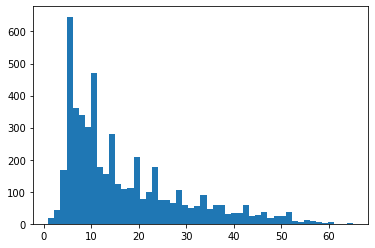

In [83]:
import matplotlib.pyplot as plt

plt.hist(hist_len, bins=50)

In [84]:
sum(hist_len)/len(x_train_small)

16.8676

In [86]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [87]:
y_train_small = y_train[0:5000]

In [93]:
import numpy as np
np.unique(y_train_small)

array([1, 2, 4, 5])

# make model


In [95]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=50))  #dim은 사전사이즈, output 행렬의 방향의 값
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
model.add(tf.keras.layers.Dense(5,activation='softmax'))  #의견을 내는 노드의 갯수 - 넘파이 유니크로 알수 있음
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])


In [ ]:
model.fit(x_train_small, y_train_small, epochs=3, batch_size=256, validation_split=0.3)
